In [25]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Copying Images
If you want to reassign an array to another variable, you should use the copy method. If we do not apply the method copy(), the variable will point to the same location in memory. Consider the following array:

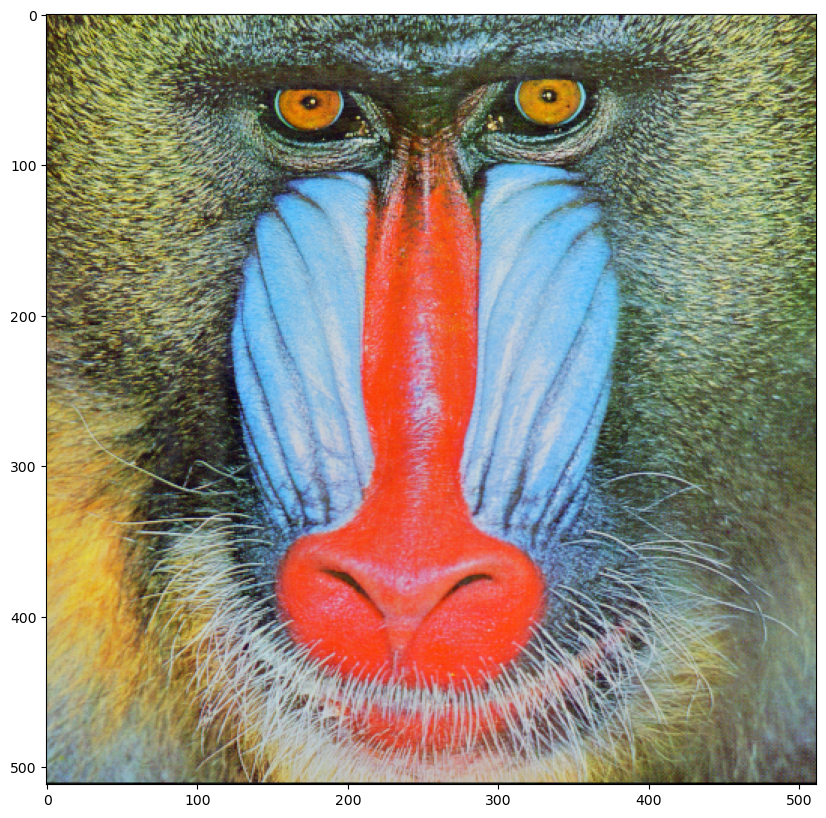

In [26]:
baboon = cv2.imread("baboon.png")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

In [27]:
A = baboon


In [28]:
id(A) == id(baboon)

True

In [29]:
#copy method
B = baboon.copy()
id(B) == id(baboon)

False

In [30]:
#baboon[:,:,:] = 0

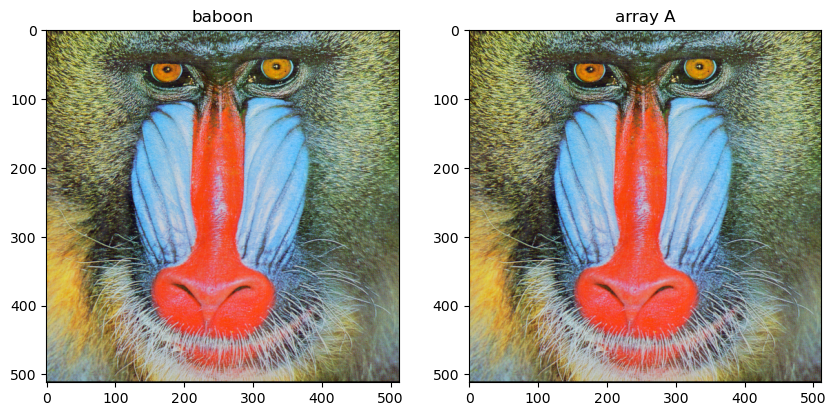

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("baboon")
plt.subplot(122)
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.title("array A")
plt.show()

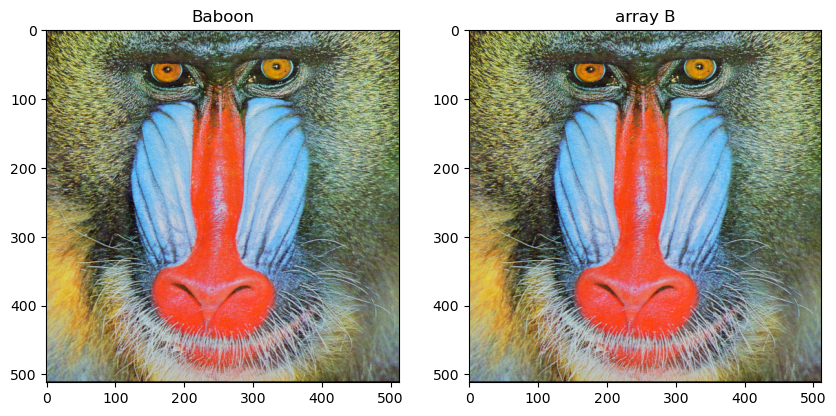

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("Baboon")
plt.subplot(122)
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.title("array B")
plt.show()

# Fliping Images
Flipping images involves reordering the index of the pixels such that it changes the orientation of the image. Consider the following image:

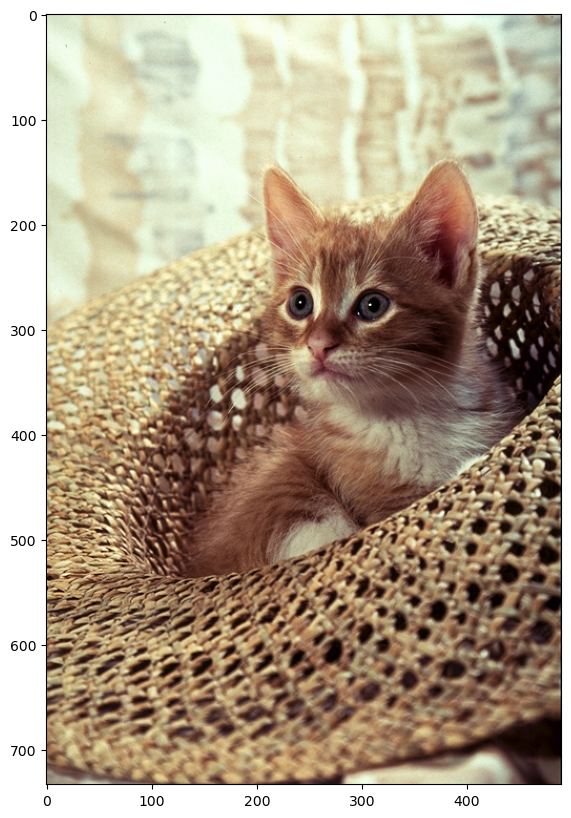

In [33]:
image = cv2.imread("cat.png")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
#Array for the image
width, height, C = image.shape
print(f"Width: {width}, Height : {height}, Color: {C}")

Width: 733, Height : 490, Color: 3


Let's Flip i.e rotate it vertically. First, we create an array of equal size of type np.uint8 bit image.

In [35]:
array_flip = np.zeros((width, height, C), dtype = np.uint8)

We assign the first row of pixels of the original array to the new array's last row. We repeat the process for every row, incrementing the row number for the original array and decreasing the new array's row index assigning the pixels accordingly.

In [38]:
for i, row in enumerate(image):
    array_flip[width - 1 - i, :, :] = row

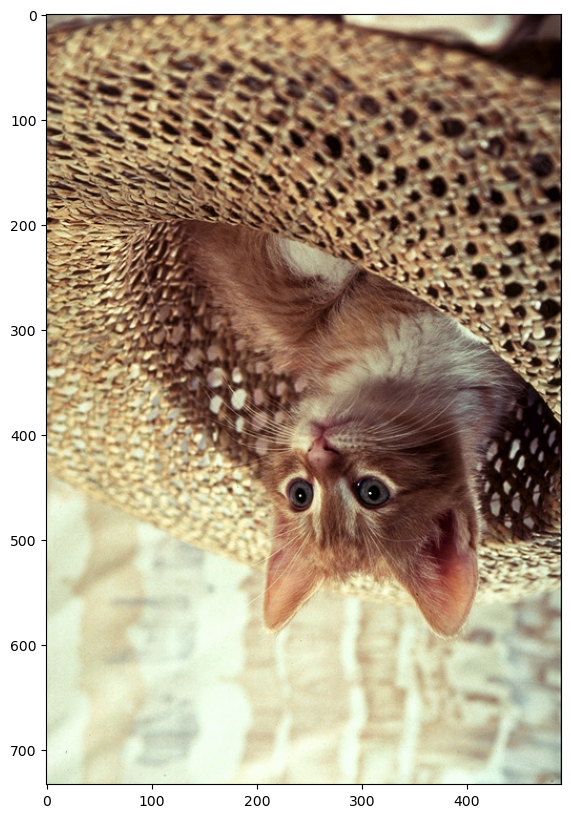

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(array_flip, cv2.COLOR_BGR2RGB))
plt.show()

OpenCVhas several ways to flip an image, we can use the flip() function; we have the input image array. The parameter is the flipCode

is the value indicating what kind of flip we would like to perform;

flipcode = 0: flip vertically around the x-axis
flipcode > 0: flip horizontally around y-axis positive value
flipcode< 0: flip vertically and horizontally, flipping around both axes negative value
Let apply different flipcode's in a loop:

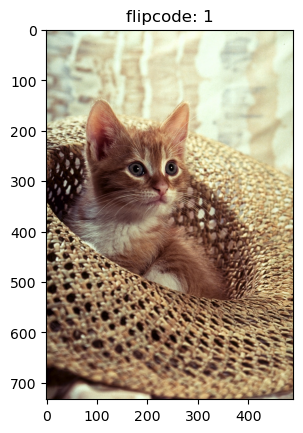

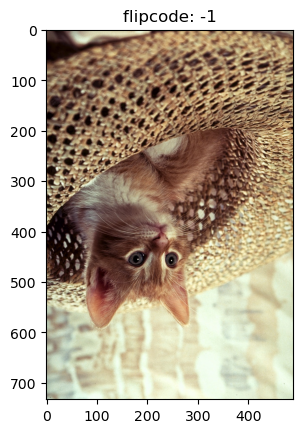

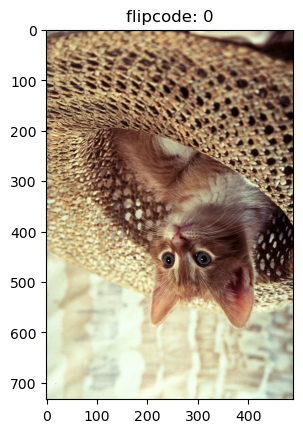

In [40]:
for flipcode in [1,-1,0]:
    im_flip = cv2.flip(image, flipcode)
    plt.imshow(cv2.cvtColor(im_flip, cv2.COLOR_BGR2RGB))
    plt.title("flipcode: "+str(flipcode))
    plt.show()

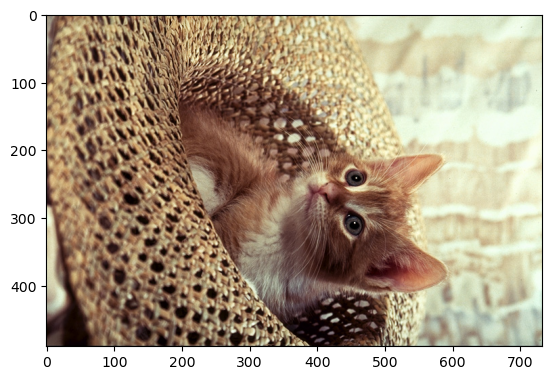

In [47]:
#Using rotate function to flip the image
im_flip = cv2.rotate(image, 0)
plt.imshow(cv2.cvtColor(im_flip, cv2.COLOR_BGR2RGB))
plt.show()

OpenCV module has built-in attributes the describe the type of flip, the values are just integers. Several are shown in the following dict:

In [48]:
flip = {"ROTATE_90_CLOCKWISE":cv2.ROTATE_90_CLOCKWISE,"ROTATE_90_COUNTERCLOCKWISE":cv2.ROTATE_90_COUNTERCLOCKWISE,"ROTATE_180":cv2.ROTATE_180}

In [49]:
flip['ROTATE_90_CLOCKWISE']

0

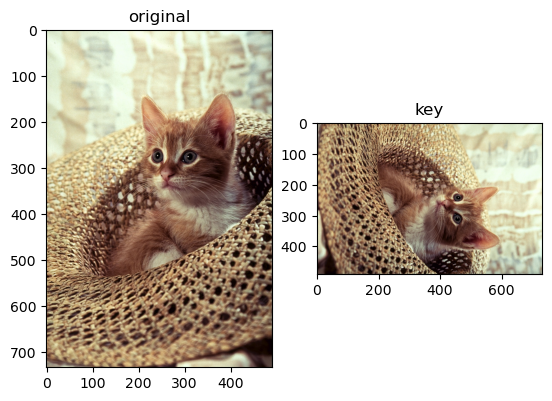

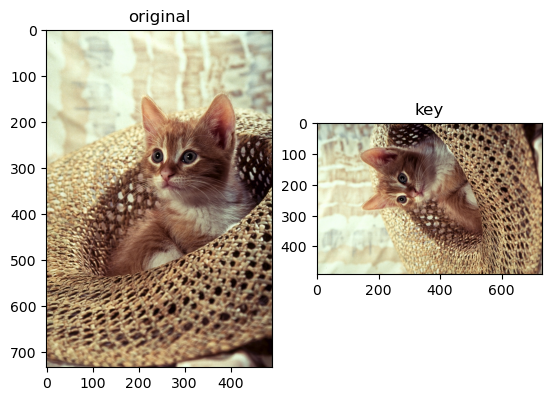

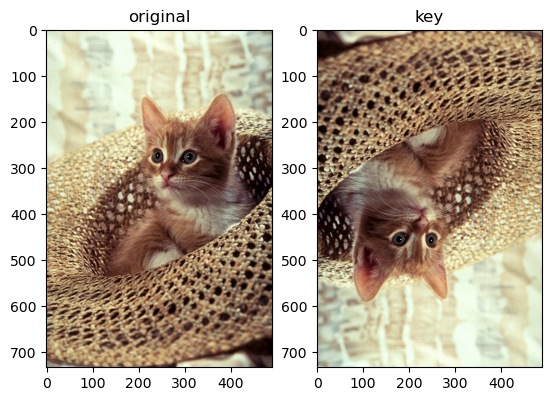

In [50]:
for key, value in flip.items():
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("original")
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(cv2.rotate(image, value), cv2.COLOR_BGR2RGB))
    plt.title("key")
    plt.show()

# Cropping an Image
Cropping is "cutting out" the part of the image and throwing out the rest; we can crop using arrays. Let start with a vertical crop; the variable upper is the first row that we would like to include in the image, the variable lower is the last row we would like to include. We then use slicing to obtain the new image.

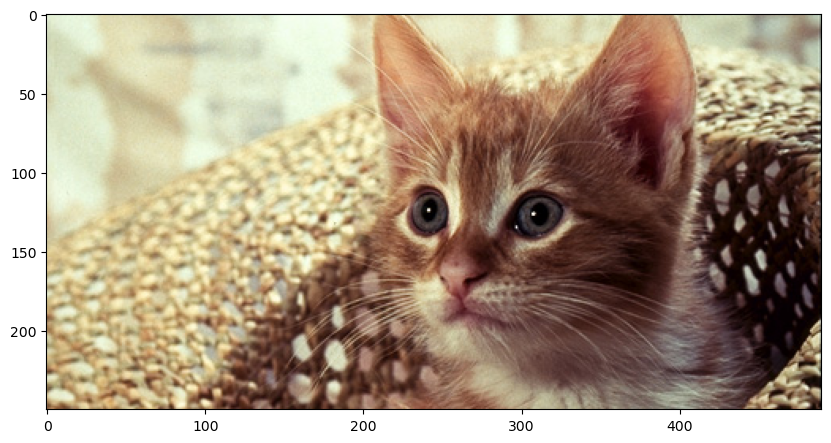

In [51]:
upper = 150
lower = 400
crop_top = image[upper: lower, :, :]
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB))
plt.show()

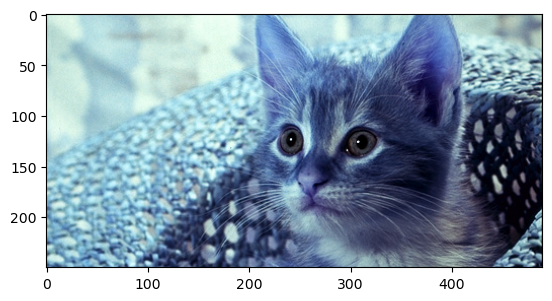

In [53]:
plt.imshow(crop_top)

# Horizontal Crop

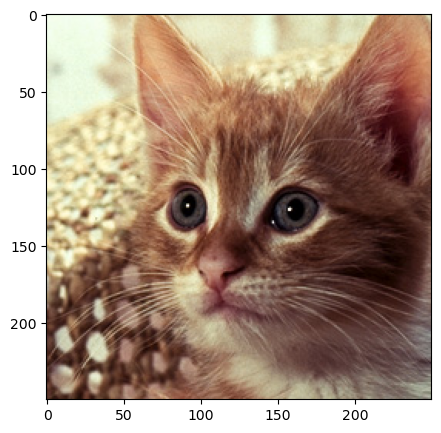

In [55]:
left = 150
right = 400
crop_horizontal = crop_top[:, left:right, :]
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(crop_horizontal, cv2.COLOR_BGR2RGB))
plt.show()

# Changing Specific Image Pixels
We can change specific image pixels using array indexing; for example, we can set all the channels in the original image we cropped to zero :

In [56]:
array_sq = np.copy(image)
array_sq[upper:lower, left:right, :] = 0

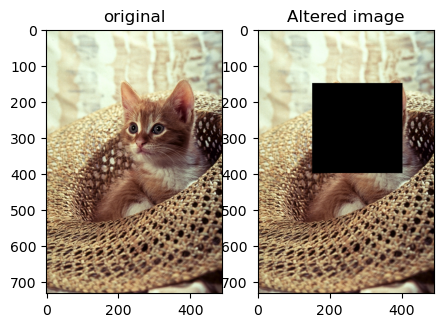

In [57]:
# Comparing Images
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(array_sq, cv2.COLOR_BGR2RGB))
plt.title("Altered image")
plt.show()

We can also create shapes and OpenCV, we can use the method rectangle. The parameter pt1 is the top-left coordinate of the rectangle: (left,top) or  (𝑥0,𝑦0)
 , pt2 is the bottom right coordinate(right,lower) or  (𝑥1,𝑦1)
 . The parameter color is a tuple representing the intensity of each channel ( blue, green, red). Finally, we have the line thickness.

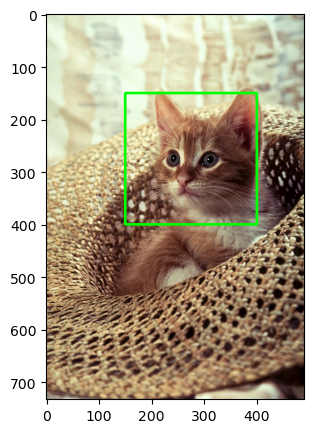

In [59]:
start_point, end_point = (left, upper), (right, lower)
image_draw = np.copy(image)
cv2.rectangle(image_draw, pt1 = start_point, pt2 = end_point, color = (0, 255, 0), thickness = 3)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.show()

We can overlay text on an image using the function putText with the following parameter values:
<br>
img: Image array <br>
text: Text string to be overlayed <br>
org: Bottom-left corner of the text string in the image <br>
fontFace: tye type of font <br>
fontScale: Font scale <br>
color: Text color <br>
thickness: Thickness of the lines used to draw a text <br>
lineType: Line type

In [ ]:
image_draw = cv2.putText(img = image, text='Stuff', org=(10,400), color = (255,255,255), fontFace = 4, fontScale=5, thickness = 4)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLO))